<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import matplotlib.dates as mdates

# Lab - Séries temporais

### Responda as seguinte perguntas usando os dados Airline Passenger Numbers




In [171]:
import pandas as pd
passenger = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
passenger_ = passenger
passenger_.dtypes

Month         object
Passengers     int64
dtype: object

In [172]:
print(f'shape dataset rows: {passenger.shape[0]} and columns: {passenger.shape[1]}')

shape dataset rows: 144 and columns: 2


*   A série é estacionária?
*   A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?
*   Em quais meses vende-se, em média, mais (menos) passagens aereas?
*   Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
*   Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro.
Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100 .
*   Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.
*   Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.
*   Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.
*   Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.
*   Verifique estatísticamente se os resíduos são estacionários.

In [173]:
passenger['Month'] = pd.to_datetime(passenger['Month'])


In [174]:
passenger.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

### A série é estacionária? Resposta no grafico.

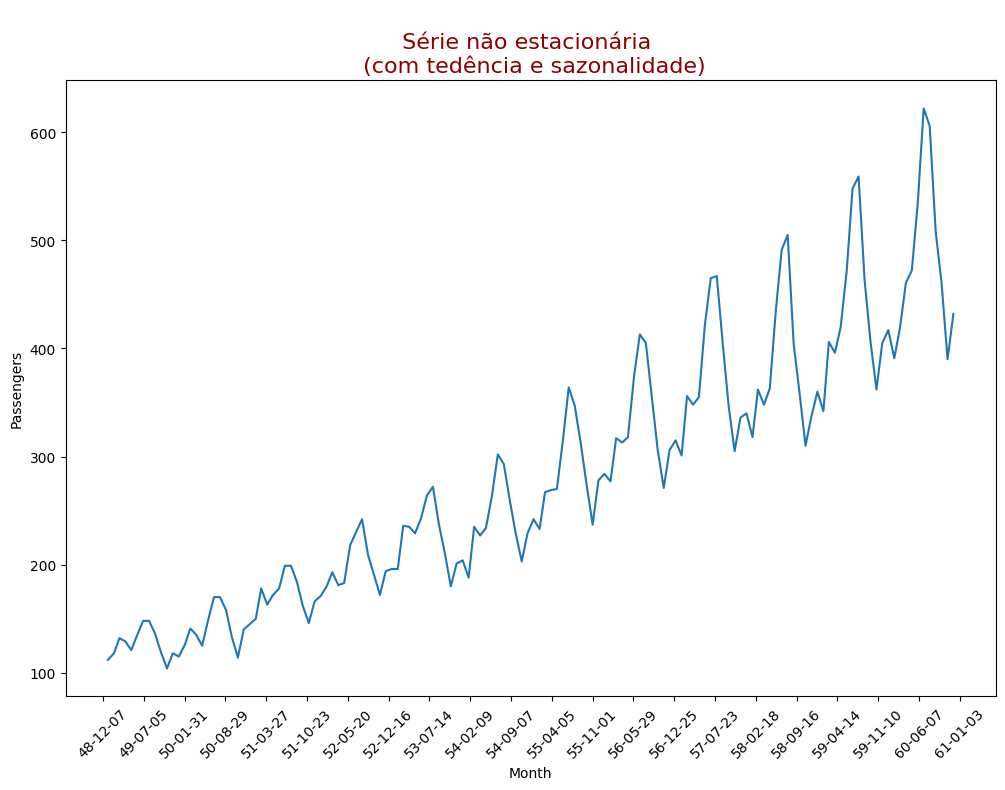

In [175]:
fig, ax = plt.subplots(figsize = (12,8))
fig = sns.lineplot(x='Month', y='Passengers', data=passenger.sort_values('Month'), ax=ax)

# Define the date format
date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=30))
ax.set_title('\n Série não estacionária  \n (com tedência e sazonalidade)',fontdict = {'fontsize' : 16},color="darkred")
plt.xticks(rotation=45)
plt.show()

In [176]:
passenger['Month'] = pd.to_datetime(passenger['Month'])
passenger = passenger.set_index('Month')

### A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?

Como a amplitude sazonal é proporcional ao nível de vendas de passagens, ou seja, a variação sazonal aumenta à medida que as vendas totais aumentam, seria mais apropriado usar um modelo multiplicativo.

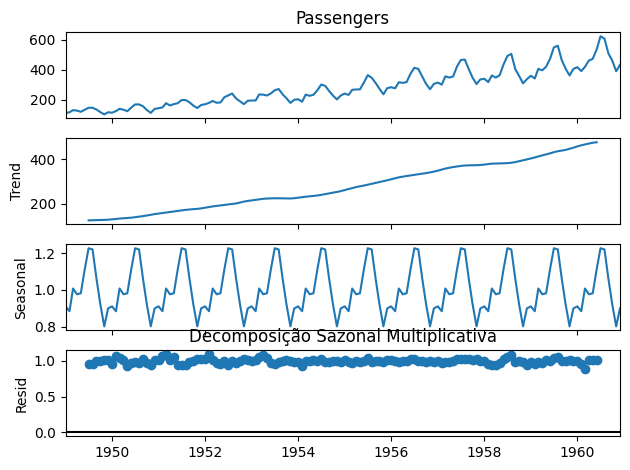

In [177]:
# Decomposição sazonal multiplicativa
result_multiplicativo = sm.tsa.seasonal_decompose(passenger['Passengers'], model='multiplicative')
result_multiplicativo.plot()
plt.title('Decomposição Sazonal Multiplicativa')
plt.show()

In [178]:
passenger_.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [179]:
L = ['year', 'month', 'day']
passenger_ = passenger_.join(pd.concat([getattr(passenger_['Month'].dt, i).rename(i) for i in L], axis=1))
passenger_ = passenger_.drop(columns=['Month', 'day', 'year'])
passenger_

,Passengers,month
0,112,1
1,118,2
2,132,3
3,129,4
4,121,5
...,...,...
139,606,8
140,508,9
141,461,10
142,390,11


In [180]:
g = passenger_.groupby("month").mean()

g

,Passengers
month,
1,241.750000
2,235.000000
3,270.166667
4,267.083333
5,271.833333
6,311.666667
7,351.333333
8,351.083333
9,302.416667


In [181]:
# Find the max and min values
max_value = g['Passengers'].max()
min_value = g['Passengers'].min()

### Em quais meses vende-se, em média, mais (menos) passagens aereas?

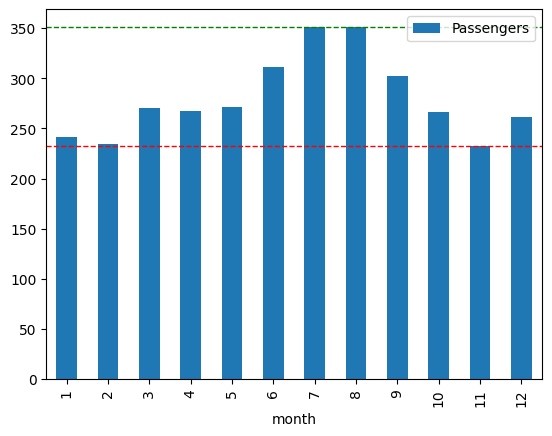

In [189]:
g.plot(kind="bar")
plt.axhline(y=max_value,linewidth=1, color='g', linestyle='--')
plt.axhline(y=min_value,linewidth=1, color='r', linestyle='--')

In [183]:
print(f'Max passsengers {round(max_value, 2)} Meses Julho e Agosto')
print(f'Min passsengers {round(min_value, 2)} Meses Fevereiro e Novembro')

Max passsengers 351.33 Meses Julho e Agosto
Min passsengers 232.83 Meses Fevereiro e Novembro


In [191]:
x = passenger_['month']
y = passenger_['Passengers']

### Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?

Text(0, 0.5, 'Passengers')

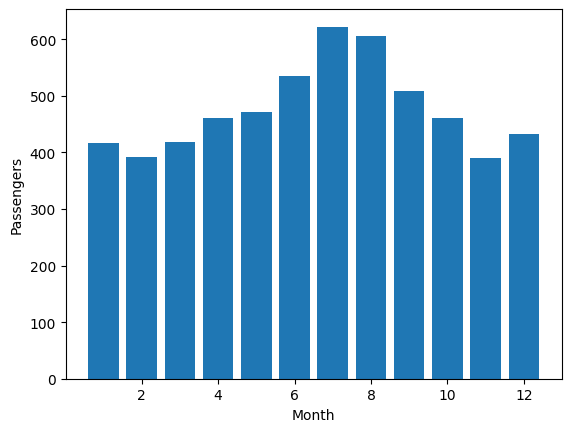

In [193]:
# checking for outliers.
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Month')
plt.ylabel('Passengers')

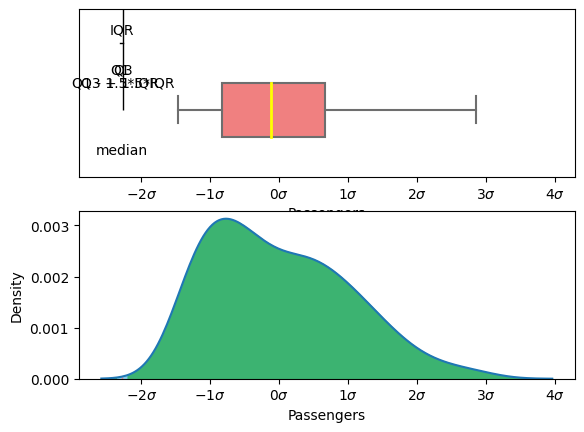

In [206]:

mean = y.mean()
std = y.std()

q1, median, q3 = np.percentile(x, [25, 50, 75])
iqr = q3 - q1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

medianprops = dict(linestyle='-', linewidth=2, color='yellow')

sns.boxplot(x=y, color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_yticks([])
ax1.tick_params(labelbottom=True)
ax1.set_ylim(-1, 1.5)
ax1.errorbar([q1, q3], [1, 1], yerr=[0, 1], color='black', lw=1)
ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
# ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

sns.kdeplot(y, ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])
plt.show()


### Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro.

#### Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100